In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#import Spain and US data
spain_df= pd.read_excel("data/Spain_Bretton_Woods_Data.xlsx", header = 1)
us_df = pd.read_excel("data/US_Bretton_Woods_Data.xlsx", header = 1)

In [3]:
#shorten column names and differentiate US data from Spain data
spain_df=spain_df.rename(columns={'Unnamed: 0':'Month','Economic Activity, Industrial Production, Index': 'Industrial_Production', 'Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate':'Nom_Exchange_Rate', 'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar':
                      'Spain_International_Reserves', 'Prices, Consumer Price Index, All items, Index':'Spain_CPI'})
us_df=us_df.rename(columns={'Unnamed: 0':'Month', 'International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar':
                      'US_International_Reserves', 'Prices, Consumer Price Index, All items, Index':'US_CPI'})

In [4]:
#merge Spain and US dataframes using month as key
sp_us_df=pd.merge(spain_df, us_df, on='Month')

In [5]:
#The monthly growth in the nominal exchange rate
sp_us_df['Nom_Exchange_Rate_Growth']=sp_us_df['Nom_Exchange_Rate'].pct_change()

#The real exchange rate
#Since the nominal exchange rate is in terms of US dollar, we divide by the CPI of Spain and multiply by the CPI of the US
sp_us_df['Real_Exchange_Rate']=sp_us_df['Nom_Exchange_Rate']*sp_us_df['US_CPI']/sp_us_df['Spain_CPI']

#The monthly growth in the real exchange rate
sp_us_df['Real_Exchange_Rate_Growth']=sp_us_df['Real_Exchange_Rate'].pct_change()

#The monthly inflation rate of Spain
sp_us_df['Spain_Inflation_Rate']=sp_us_df['Spain_CPI'].pct_change()

In [6]:
#The monthly growth in industrial production
sp_us_df['Industrial_Production_Monthly_Growth']=sp_us_df['Industrial_Production'].pct_change()

#The growth in industrial production versus 12 months ago
sp_us_df['Industrial_Production_Yearly_Growth']=sp_us_df['Industrial_Production'].pct_change(periods=12)

#An index of the value of Spain's international reserves (value of reserves at January 1960 = 100))
sp_us_df['Spain_International_Reserves_Index']=sp_us_df['Spain_International_Reserves']/sp_us_df['Spain_International_Reserves'][0]*100


In [7]:
#The monthly inflation rate of the US
sp_us_df['US_Inflation_Rate']=sp_us_df['US_CPI'].pct_change()

#An index of the value of the US's international reserves(value of reserves at January 1960 = 100))
sp_us_df['US_International_Reserves_Index']=sp_us_df['US_International_Reserves']/sp_us_df['US_International_Reserves'][0]*100

In [8]:
#change date format from string to datetime

dict={'Jan': 1,
      'Feb': 2,
      'Mar': 3,
      'Apr': 4,
      'May': 5,
      'Jun': 6,
      'Jul': 7,
      'Aug': 8,
      'Sep': 9,
      'Oct': 10,
      'Nov': 11,
      'Dec': 12}

months=[]

for i in range(len(sp_us_df)):
    str_month=sp_us_df['Month'][i].split(" ")[0]
    month=dict[str_month]
    year=int(sp_us_df['Month'][i].split(" ")[1])
    months.append(datetime.datetime(year, month, 1))

sp_us_df['Month']=months


<function matplotlib.pyplot.show(close=None, block=None)>

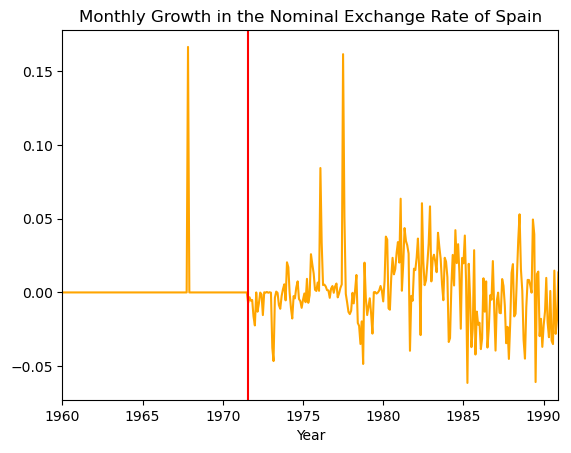

In [16]:
plt.plot(sp_us_df['Month'], sp_us_df['Nom_Exchange_Rate_Growth'], color='orange')
plt.xlim(datetime.datetime(1960, 1, 1), datetime.datetime(1990, 12, 1))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.xlabel('Year')
plt.title('Monthly Growth in the Nominal Exchange Rate of Spain')
plt.savefig('figures/Monthly_Growth_in_Nom_Exchange_Rate.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

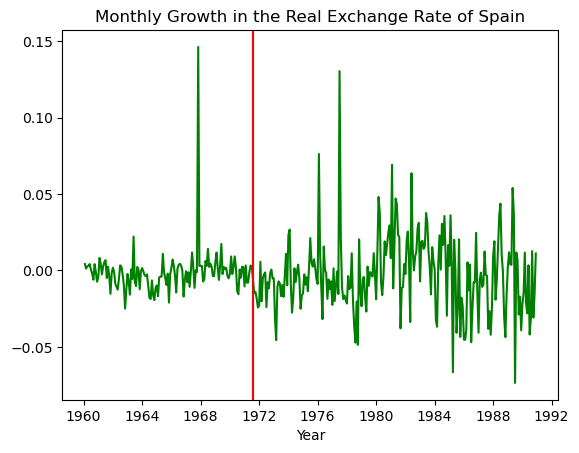

In [17]:
plt.plot(sp_us_df['Month'], sp_us_df['Real_Exchange_Rate_Growth'], color='g')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('Monthly Growth in the Real Exchange Rate of Spain')
plt.xlabel('Year')
plt.savefig('figures/Monthly_Growth_in_Real_Exchange_Rate.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

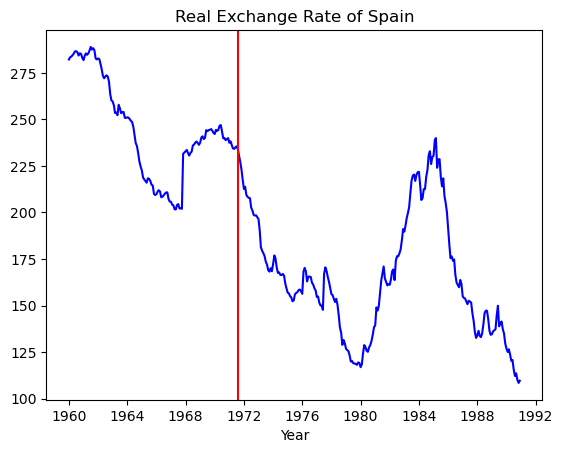

In [18]:
plt.plot(sp_us_df['Month'], sp_us_df['Real_Exchange_Rate'], color='b')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('Real Exchange Rate of Spain')
plt.xlabel('Year')
plt.savefig('figures/Real_Exchange_Rate.pdf')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

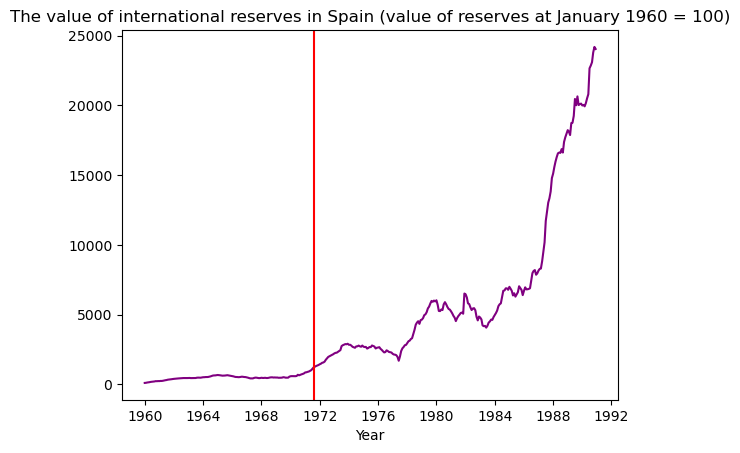

In [19]:
plt.plot(sp_us_df['Month'], sp_us_df['Spain_International_Reserves_Index'], color='purple')
plt.axvline(x = datetime.datetime(1971, 8, 1), color='r')
plt.title('The value of international reserves in Spain (value of reserves at January 1960 = 100)')
plt.xlabel('Year')
plt.savefig('figures/Spain_International_Reserves_Index.pdf')
plt.show